<a href="https://colab.research.google.com/github/naoya1110/DL_Lecture_202107/blob/main/Chapter04_Image_Processing_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 04: Image Processing with OpenCV

ここでは[OpenCV](https://opencv.org/)というパッケージを用いて画像データを取り扱う方法を習得しましょう。CVはComputer Visionの略でオープンソースの画像処理ツールとしてとても有名です。PythonだけでなくC++やJava等の他の言語でも使用可能だそうです。

まずはOpenCV(cv2), Numpy, Matplotlib, os等のパッケージをインポートします。

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os    # ファイル操作用のパッケージ

googleドライブをマウントしてファイルにアクセスできるようにします。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


googleドライブ内の`DL_Lecture_202107`ディレクトリを作業ディレクトリ`working_dir`として設定します。

In [ ]:
working_dir = "/content/drive/MyDrive/DL_Lecture_202107"

このディレクトリ内にある`cat.jpg`を読み込みます。

まずはこのファイルのパスを作成します。

In [ ]:
filepath = os.path.join(working_dir, "cat.jpg")
filepath

'/content/drive/MyDrive/DL_Lecture_202107/cat.jpg'

このファイルパスにファイルが本当に存在するか確認しておきます。`True`と表示されればファイルが存在します，`False`の場合はファイルが存在しないかファイルパスが間違っています。

In [ ]:
os.path.exists(filepath)

True

次のようにファイルパスからファイル名を取得することもできます。

In [ ]:
os.path.basename(filepath)

'cat.jpg'

次のようにファイルパスからそのファイルが存在するディレクトリまでのパスを取得することもできます。

In [ ]:
os.path.dirname(filepath)

'/content/drive/MyDrive/DL_Lecture_202107'

ファイルパスの操作は後程DLの学習用データを作成するときなどにも利用します。

pathのファイルをopencvで読み込んで，matplotlibで表示します。

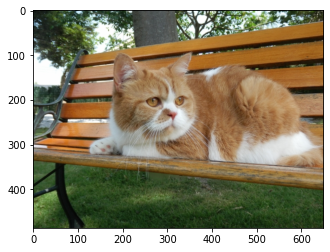

In [ ]:
# cat.jpgの読み込み
img = cv2.imread(filepath)

# BGR->RGBの変換（opencv特有）
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(img)

# グリッド線を表示しない
plt.grid(False)

imgのデータタイプを確認してみましょう。次のセルを実行するとopencvで読み込んだ画像データはnumpy配列として扱われていることが分かります。

In [ ]:
type(img)

numpy.ndarray

imgの配列サイズを確認してみましょう。セルの実行結果は（行 [高さ], 列 [幅], 色数）となっており，カラー画像（RGB）なので，色数（チャンネル数とも呼ばれる）が3の三次元配列になっていることが分かります。

In [ ]:
img.shape

(487, 650, 3)

グレースケールに変換して表示してみましょう。

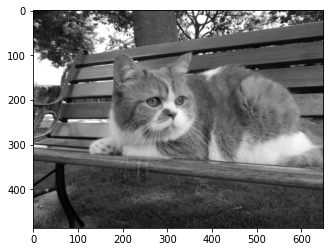

In [ ]:
# グレースケールに変換
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像を表示
plt.imshow(img_gs, cmap="gray")

# グリッド線を表示しない
plt.grid(False)

img_grayの配列サイズを確認してみましょう。グレースケール画像なのでセルの実行結果は（行 [高さ], 列 [幅]）と二次元配列になっていることが分かります。

In [ ]:
img_gs.shape

(487, 650)

取り込んだ画像に，図形を描き加えることもできます。

画像の中の猫を枠で囲んでみましょう。

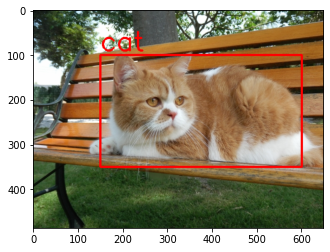

In [ ]:
# もう一度ファイルの読み込み
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 枠の範囲を指定
top = 100
bottom = 350
left = 150
right = 600

# 枠の色(R, G, B)を指定 ：０が最小，255が最大
color=(255, 0, 0)

# 枠の線幅を指定
linewidth = 3

# 枠を描画 （長方形なので rectangleを使用）
img = cv2.rectangle(img, (left, top), (right, bottom), color, linewidth)


# テキストを指定して描画
text = "cat"
position = (left, top-10)
font = cv2.FONT_HERSHEY_SIMPLEX
fontsize = 2
fontwidth = 3
img = cv2.putText(img, text, position, font, fontsize, color, fontwidth)

# 画像を表示
plt.imshow(img)
plt.grid(False)

画像の一部（猫）を切り出して表示してみましょう。
画像は配列として読み込まれているため，配列から要素を取り出すスライスを利用します。

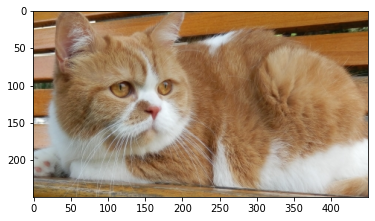

In [ ]:
# もう一度ファイルの読み込み
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 枠で囲った領域をスライス
img_slice = img[top:bottom, left:right, :]
plt.imshow(img_slice)
plt.grid(False)

切り出した画像を200x200ピクセルの正方形に無理やり整形してみましょう。

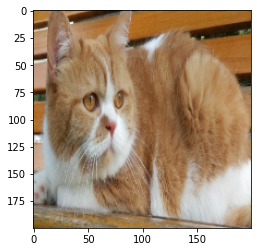

In [ ]:
img_square = cv2.resize(img_slice, (200, 200))
plt.imshow(img_square)

整形した画像を保存してみましょう。保存形式はjpg, png, bmp等が利用できます。

In [ ]:
# 色を変換
img_save = cv2.cvtColor(img_square, cv2.COLOR_RGB2BGR)

# 保存先のパスを作成
new_filename = "cat_edit.jpg"
new_filepath = os.path.join(working_dir, new_filename)

# 保存
cv2.imwrite(new_filepath, img_save)

True

Trueと表示されれば指定したパスに画像が保存されているか確認しましょう。